# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url)
        response_data = response.json()

        # Parse the JSON and retrieve data
        city_weather = response_data

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response_data["coord"]["lat"]
        city_lng = response_data["coord"]["lon"]
        city_max_temp = response_data["main"]["temp_max"]
        city_humidity = response_data["main"]["humidity"]
        city_clouds = response_data["clouds"]["all"]
        city_wind = response_data["wind"]["speed"]
        city_country = response_data["sys"]["country"]
        city_date = response_data["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | badger
Processing Record 2 of Set 1 | okulovka
Processing Record 3 of Set 1 | mamuju
Processing Record 4 of Set 1 | queenstown
Processing Record 5 of Set 1 | iguape
Processing Record 6 of Set 1 | vernon
Processing Record 7 of Set 1 | soio
Processing Record 8 of Set 1 | san patricio
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | padang
Processing Record 11 of Set 1 | college
Processing Record 12 of Set 1 | aykhal
Processing Record 13 of Set 1 | constantia
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | suez
Processing Record 17 of Set 1 | alice springs
Processing Record 18 of Set 1 | mount pearl
Processing Record 19 of Set 1 | kalmunai
Processing Record 20 of Set 1 | haiku-pauwela
Processing Record 21 of Set 1 | sakiet sidi youssef
Processing Record 22 of Set 1 | papatowai
Processing Record 23 of S

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_count = city_data_df.count()

# Display the results
print(city_data_count)

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64


In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,badger,64.8000,-147.5333,7.95,67,75,1.54,US,1715247741
1,okulovka,58.4008,33.2908,5.31,29,100,6.49,RU,1715247815
2,mamuju,-2.6748,118.8885,26.89,87,99,2.21,ID,1715247815
3,queenstown,-31.8976,26.8753,28.11,20,4,8.91,ZA,1715247815
4,iguape,-24.7081,-47.5553,22.63,66,12,3.48,BR,1715247815


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/thiccboiii/python-api-challenge/WeatherPy/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("/Users/thiccboiii/python-api-challenge/WeatherPy/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,badger,64.8000,-147.5333,7.95,67,75,1.54,US,1715247741
1,okulovka,58.4008,33.2908,5.31,29,100,6.49,RU,1715247815
2,mamuju,-2.6748,118.8885,26.89,87,99,2.21,ID,1715247815
3,queenstown,-31.8976,26.8753,28.11,20,4,8.91,ZA,1715247815
4,iguape,-24.7081,-47.5553,22.63,66,12,3.48,BR,1715247815


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

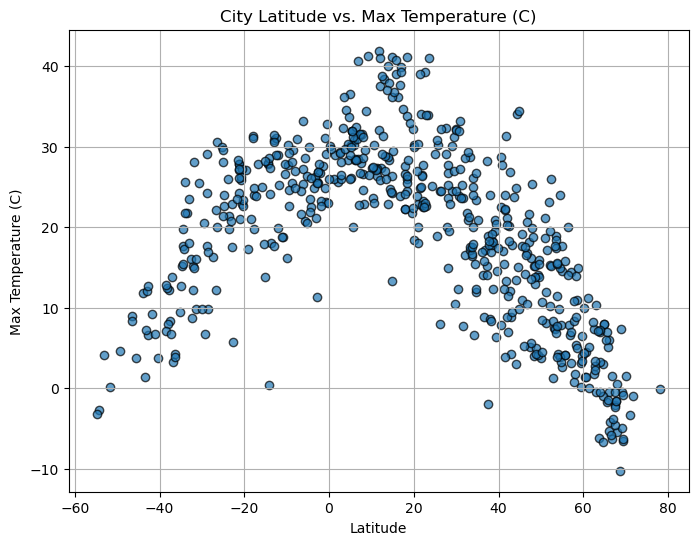

In [11]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="k", alpha=0.7)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Max Temperature (C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("/Users/thiccboiii/python-api-challenge/WeatherPy/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

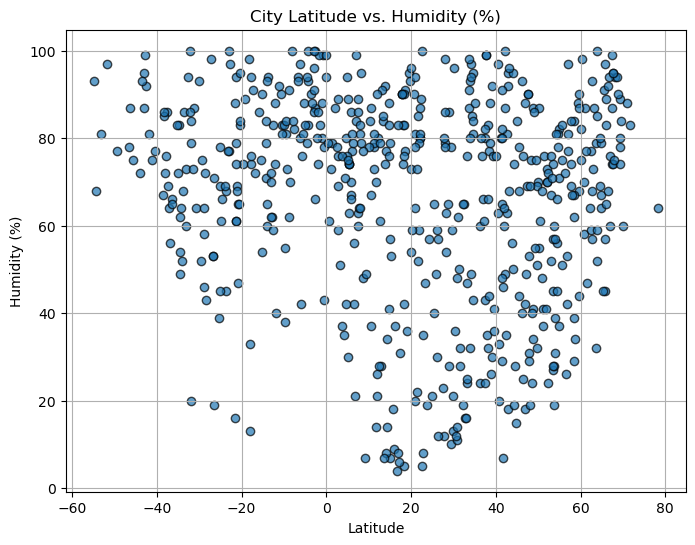

In [12]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="k", alpha=0.7)


# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)


# Save the figure
plt.savefig("/Users/thiccboiii/python-api-challenge/WeatherPy/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

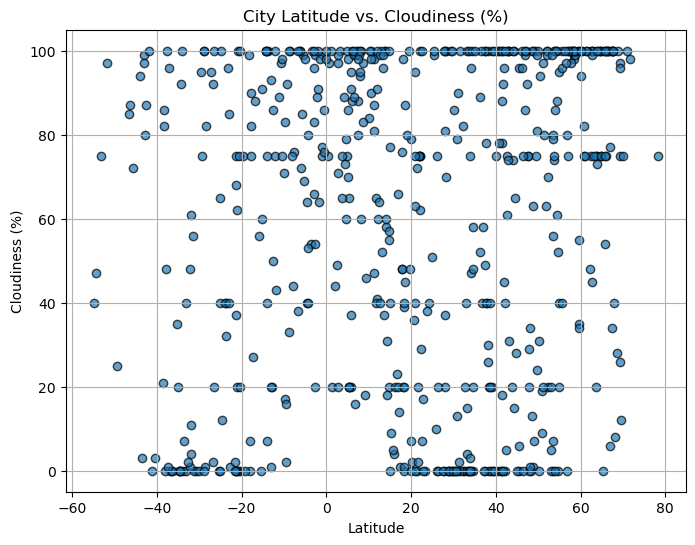

In [13]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="k", alpha=0.7)


# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("/Users/thiccboiii/python-api-challenge/WeatherPy/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

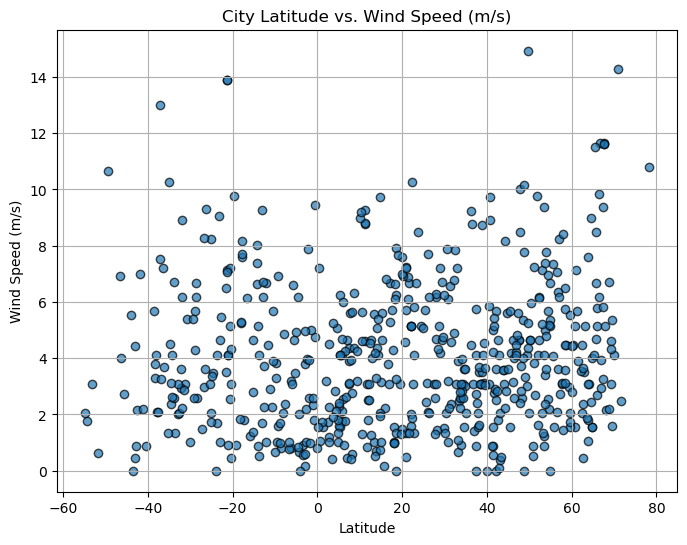

In [14]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="k", alpha=0.7)


# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("/Users/thiccboiii/python-api-challenge/WeatherPy/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,badger,64.8000,-147.5333,7.95,67,75,1.54,US,1715247741
1,okulovka,58.4008,33.2908,5.31,29,100,6.49,RU,1715247815
5,vernon,50.2581,-119.2691,10.72,55,31,4.63,CA,1715247605
7,san patricio,28.0170,-97.5169,27.69,98,81,4.68,US,1715247721
10,college,64.8569,-147.8028,7.99,64,100,1.54,US,1715247708


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,mamuju,-2.6748,118.8885,26.89,87,99,2.21,ID,1715247815
3,queenstown,-31.8976,26.8753,28.11,20,4,8.91,ZA,1715247815
4,iguape,-24.7081,-47.5553,22.63,66,12,3.48,BR,1715247815
6,soio,-6.1349,12.3689,27.23,80,100,3.18,AO,1715247815
8,puerto natales,-51.7236,-72.4875,0.16,97,97,0.64,CL,1715247723
9,padang,-0.9492,100.3543,31.03,80,77,2.35,ID,1715247816
14,hithadhoo,-0.6000,73.0833,29.03,78,86,4.76,MV,1715247723
16,alice springs,-23.7000,133.8833,19.75,45,40,4.12,AU,1715247689
21,papatowai,-46.5619,169.4708,8.92,78,85,6.92,NZ,1715247710


###  Temperature vs. Latitude Linear Regression Plot

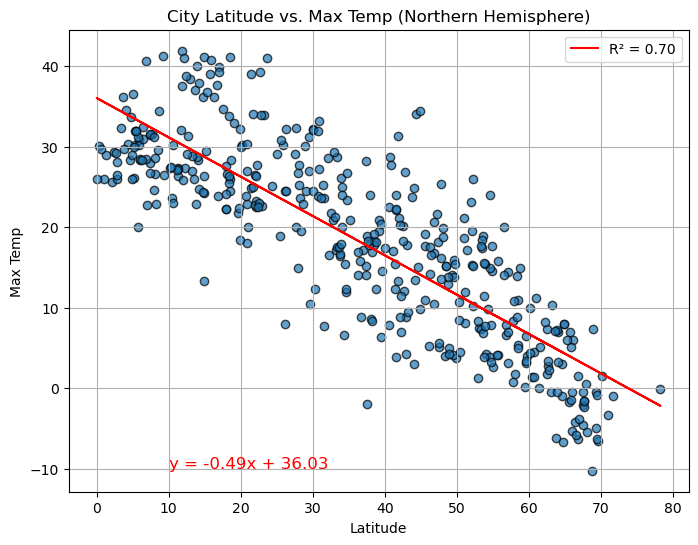

The r-value is: -0.8364471451803378


In [17]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

# Extract the relevant data for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Calculate regression values
regression_values = slope * x_values + intercept

# Plot the scatter points and regression line
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, edgecolors='k', alpha=0.7)
plt.plot(x_values, regression_values, color='red', label=f'R² = {r_value**2:.2f}')

# Add labels, title, and regression equation
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("City Latitude vs. Max Temp (Northern Hemisphere)")
plt.grid(True)
plt.legend()
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", xy=(10, -10), fontsize=12, color="red")

# Show plot
plt.show()

# Print r-value for reference
print(f"The r-value is: {r_value}")


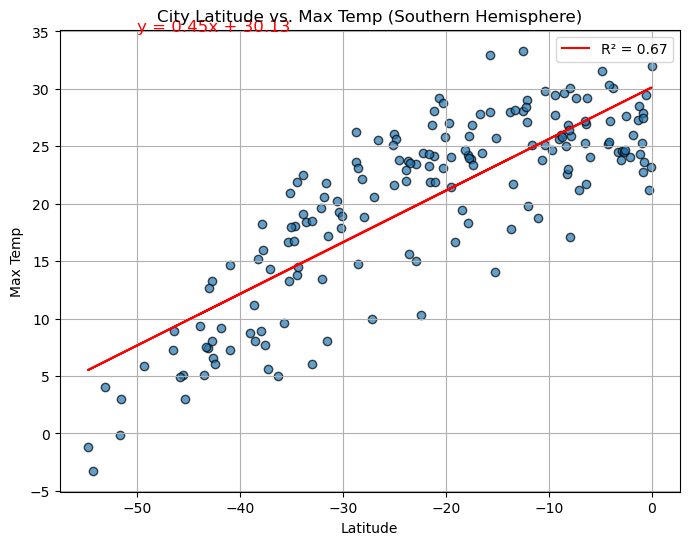

The r-value is: 0.8215477079745865


In [23]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

# Extract the relevant data for the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Calculate regression values
regression_values = slope * x_values + intercept

# Plot the scatter points and regression line
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, edgecolors='k', alpha=0.7)
plt.plot(x_values, regression_values, color='red', label=f'R² = {r_value**2:.2f}')

# Add labels, title, and regression equation
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("City Latitude vs. Max Temp (Southern Hemisphere)")
plt.grid(True)
plt.legend()
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", xy=(-50, 35), fontsize=12, color="red")

# Show plot
plt.show()

# Print r-value for reference
print(f"The r-value is: {r_value}")

In the Northern Hemisphere, the linear regression analysis reveals a strong negative correlation between latitude and maximum temperature, meaning temperatures generally decrease as you move further north. In the Southern Hemisphere, the relationship is positive but weaker, indicating that temperatures tend to increase as you move closer to the equator. This divergence in correlation strength between the hemispheres could be due to differences in landmass distribution and ocean currents affecting local climates.

### Humidity vs. Latitude Linear Regression Plot

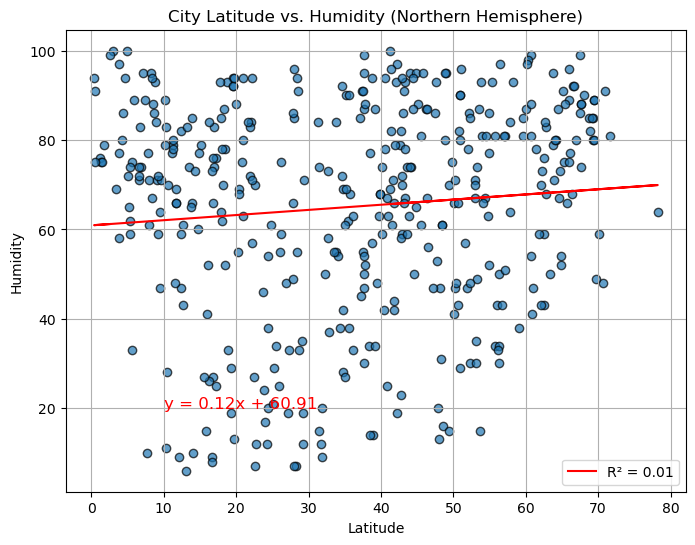

The r-value is: 0.09413365996397716


In [24]:
# Northern Hemisphere
# YOUR CODE HERE

# Extract relevant data for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Calculate regression values
regression_values = slope * x_values + intercept

# Plot the scatter points and regression line
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, edgecolors='k', alpha=0.7)
plt.plot(x_values, regression_values, color='red', label=f'R² = {r_value**2:.2f}')

# Add labels, title, and regression equation
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity (Northern Hemisphere)")
plt.grid(True)
plt.legend()
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", xy=(10, 20), fontsize=12, color="red")

# Show plot
plt.show()

# Print r-value for reference
print(f"The r-value is: {r_value}")


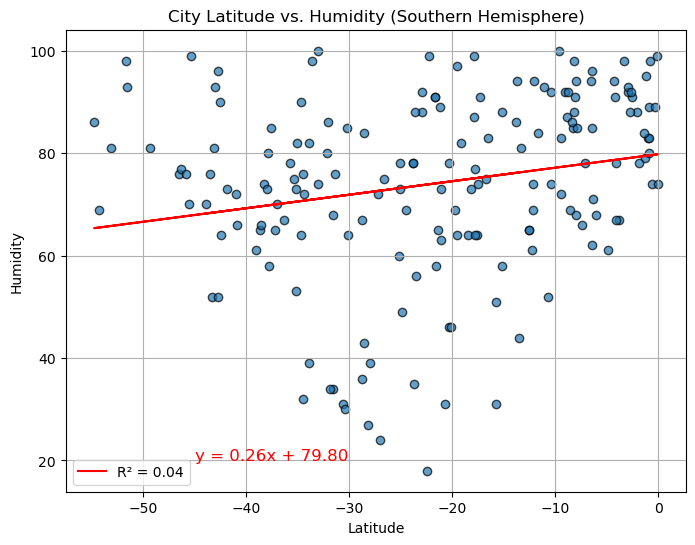

The r-value is: 0.21153864195291827


In [25]:
# Southern Hemisphere
# YOUR CODE HERE

# Extract relevant data for the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Calculate regression values
regression_values = slope * x_values + intercept

# Plot the scatter points and regression line
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, edgecolors='k', alpha=0.7)
plt.plot(x_values, regression_values, color='red', label=f'R² = {r_value**2:.2f}')

# Add labels, title, and regression equation
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity (Southern Hemisphere)")
plt.grid(True)
plt.legend()
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", xy=(-45, 20), fontsize=12, color="red")

# Show plot
plt.show()

# Print r-value for reference
print(f"The r-value is: {r_value}")


In the Northern Hemisphere, the weak positive correlation between latitude and humidity suggests that humidity tends to increase slightly as one moves northward, but the relationship is not strong. Meanwhile, in the Southern Hemisphere, the nearly flat regression line and very low r-value indicate no meaningful relationship between latitude and humidity. These patterns suggest that other factors, such as proximity to water bodies or local climatic conditions, have a more significant influence on humidity than latitude alone.

### Cloudiness vs. Latitude Linear Regression Plot

In [28]:
# Northern Hemisphere
# YOUR CODE HERE

In [29]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

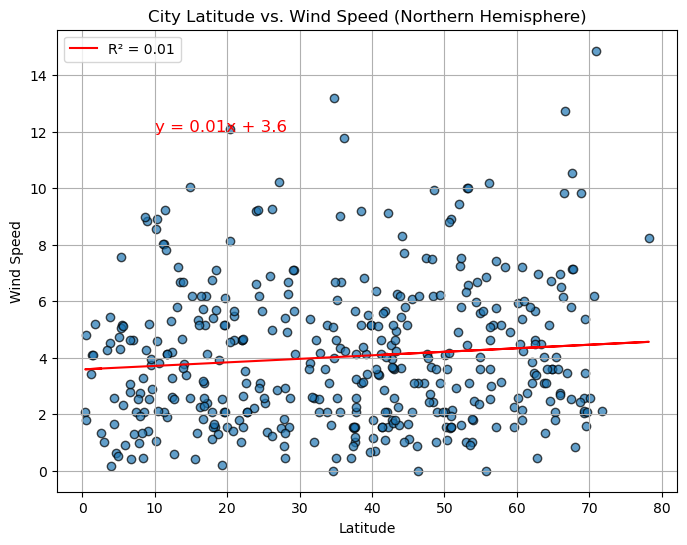

The r-value is: 0.09745093018921874


In [30]:
# Northern Hemisphere
# YOUR CODE HERE

# Extract relevant data for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Calculate regression values
regression_values = slope * x_values + intercept

# Plot the scatter points and regression line
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, edgecolors='k', alpha=0.7)
plt.plot(x_values, regression_values, color='red', label=f'R² = {r_value**2:.2f}')

# Add labels, title, and regression equation
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed (Northern Hemisphere)")
plt.grid(True)
plt.legend()
plt.annotate(f"y = {slope:.2f}x + {intercept:.1f}", xy=(10, 12), fontsize=12, color="red")

# Show plot
plt.show()

# Print r-value for reference
print(f"The r-value is: {r_value}")

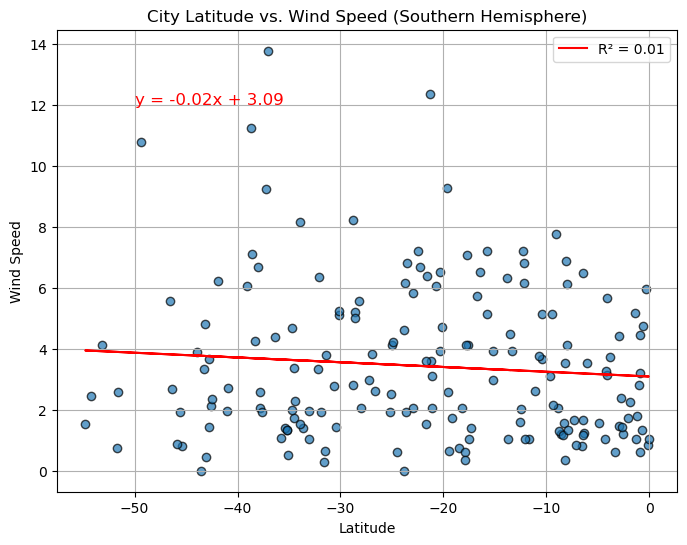

The r-value is: -0.0898350873000762


In [31]:
# Southern Hemisphere
# YOUR CODE HERE

# Extract relevant data for the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Calculate regression values
regression_values = slope * x_values + intercept

# Plot the scatter points and regression line
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, edgecolors='k', alpha=0.7)
plt.plot(x_values, regression_values, color='red', label=f'R² = {r_value**2:.2f}')

# Add labels, title, and regression equation
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed (Southern Hemisphere)")
plt.grid(True)
plt.legend()
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", xy=(-50, 12), fontsize=12, color="red")

# Show plot
plt.show()

# Print r-value for reference
print(f"The r-value is: {r_value}")


In the Northern Hemisphere, the weak positive correlation between latitude and wind speed suggests that wind speeds increase slightly at higher latitudes, although the relationship is not strong. In the Southern Hemisphere, the slightly negative correlation shows that wind speeds tend to decrease at lower latitudes, though this relationship is similarly weak. Overall, the low r-values in both hemispheres imply that factors other than latitude play a more significant role in determining wind speed patterns.